# Assignment 2 K-Means Clustering

In [30]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.linear_model import LogisticRegression

images, target = fetch_olivetti_faces(return_X_y=True)

In [31]:
## Splitting training, validation ,and test sets with ratio: 60%, 20% and 20%
## Training set is the majority in order to train the model with more data

## Firstly we split the 20% test set
sss = StratifiedShuffleSplit(test_size=0.2, random_state=0)
for data_index, test_index in sss.split(images, target):
     x, x_test = images[data_index], images[test_index]
     y, y_test = target[data_index], target[test_index]

## Then splitting the 20% validation set (note: to get the 20% from the total set, we use 25% of the remaining set
## after split the test set previously)
sss1 = StratifiedShuffleSplit(test_size=0.25, random_state=0)
for train_index, val_index in sss1.split(x, y):
     x_train, x_val = x[train_index], x[val_index]
     y_train, y_val = y[train_index], y[val_index]

In [32]:
## Using k-fold cross validation to train a classifier to predict which person is represented in each picture, and evaluate it.
log_reg = LogisticRegression(random_state=0)

scores = cross_val_score(log_reg, images, target)
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard deviation:", scores.std())

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

Scores: [1.    0.95  0.95  0.975 0.95 ]
Mean: 0.9650000000000001
Standard deviation: 0.020000000000000018


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The number of clusters : 36 
 gives the best silhouette score:  0.14500754


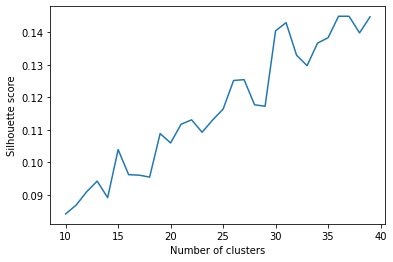

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

## Finding the best number of clusters to reduce the dimensionality
## 'k' is array of number of clusters to be evaluated by silhouette score and 'sliScore' is array of the
## silhouette scores for each number of clusters
## clusters to be evaluated from 10 to 39
k=[]
silScores=[]
for i in range(10, 40):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(images)
    silScore = silhouette_score(images, kmeans.labels_)
    k.append(i)
    silScores.append(silScore)

p=plt.plot(k,silScores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")

print("The number of clusters :", k[np.argmax(silScores)], "\n gives the best silhouette score: ", silScores[np.argmax(silScores)])

In [34]:
## Finding the new reduced targets based on the best number of clusters found
n_clusters=k[np.argmax(silScores)]
red_target = KMeans(n_clusters=n_clusters, random_state=0).fit_predict(images)

In [35]:
## Using k-fold cross validation to train a classifier with the new reduced targets.
log_reg_new = LogisticRegression(random_state=0)

scores_new = cross_val_score(log_reg, images, red_target)

print("Scores:", scores_new)
print("Mean:", scores_new.mean())
print("Standard deviation:", scores_new.std())

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of 

Scores: [0.7875 0.825  0.8125 0.85   0.725 ]
Mean: 0.8
Standard deviation: 0.042573465914816


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
